<h1 style="text-align:center;color:red;" > Quora Question Pairs Similarity </h1>


# 1. Problem and Goal
## 1.1 What is Quora: 
Quora is very popular plateform for learners, here we can ask question and get answers of any kind of topics. It is very usefull for knowledge purpose for students, professionals, teachers and industry leaders all keen to share their knowledge.
Quora has approximatly <b>300 million monthly active users</b> of all field, Moslty everyone visits quora if they are looking for something on internet. It is one of the best social site for learners.
## 1.2  Problem statement
We asks questions on quora, two or more people may ask the same questions in different wordings, The meaning of question is same but they had used differnt sentences. For example :   
<ul>
    <li><b>Q1: Where can I get cheap food in Kanpur?</b></li>
  <li><b>Q2 Where are the cheap food sold in Kanpur?</b></li>
  <li><b>Q3 How can I get cheap food in kanpur?</b></li>
</ul>
All the questions have same meaning but they are worded differntly. So our goal is to find duplicate questions and merge their answers so that we can get better results.
<ul>
  <li>Find and merge the questions which are already asked on quora.</li>
  <li>If someone asks any question, we should give them answers if that question is already answered in past.</li>
  <li>Aim of this project is to predict if Question1 is duplicate of Question2.</li>
</ul>

## 1.3 Useful Links for this project 
Dataset is taken from https://www.kaggle.com/c/quora-question-pairs

# 2. Engineering problem
## 2.1 Know the dataset
dataset is taken from https://www.kaggle.com/c/quora-question-pairs 
<p> 
 Data will be in a file Train.csv <br>
 Train.csv contains 6 columns : id, qid1, qid2, question1, question2, is_duplicate <br>
 Size of Train.csv - 60MB <br>
 Number of rows in Train.csv = 404,290
</p>

## 2.2 Problem specification

It is a binary classification task. We have 2 possible output for is_duplicate (Yes/No).
<img src="confusion_mat.png" alt="Confusion Matrix" style="width:300px;height:300px;">
<h3 style="color:red;" > False Negative Rate </h3>
<b>Model predicted negative and it was false.</b><br> Our model predicted two questions are not duplicate but they are duplicate.
<h3 style="color:red;" > False Positive Rate </h3><b>Model predicted positive and it was false.</b><br> Our model predicted two questions are duplicate but they are different.<br><br>
High False positive rate will affect model badly, if we will merge the answer of  two different questions it we be very bad and  customers will not visit this site again. We have to minimize FPR for this problem. 

## 2.3 Problem Constraint
<ul>
  <li>Cost of misclassification is very high.</li>
  <li>We will use Log-loss as primary performance metric</li>
  <li>Confusion matrix will be secondary performance metric to check FPR.</li>
</ul>



<h1 style="text-align:center;color:red;" > Exploratory Data Analysis </h1>


In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


## 3.1 Loading and Understanding dataset 

In [35]:
# Loading trainging dataset
df = pd.read_csv('Train.csv')
print("There are "+ str(df.shape[0]) + " Data points in the given training set")
print("There are "+ str(df.shape[1]) + " features in the given training set")
df.shape

There are 404290 Data points in the given training set
There are 6 features in the given training set


(404290, 6)

In [36]:
df.head(8)

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
5,5,11,12,Astrology: I am a Capricorn Sun Cap moon and c...,"I'm a triple Capricorn (Sun, Moon and ascendan...",1
6,6,13,14,Should I buy tiago?,What keeps childern active and far from phone ...,0
7,7,15,16,How can I be a good geologist?,What should I do to be a great geologist?,1


Here <b>id</b> is index of dataset(row number) and <b>qid1</b> and <b>qid2</b> is unique Question id of Question1 and Question2, <b>question1</b> and <b>question2</b> are text of given question. <b>is_duplicate</b> represent if questions are duplicate or not.

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
id              404290 non-null int64
qid1            404290 non-null int64
qid2            404290 non-null int64
question1       404289 non-null object
question2       404288 non-null object
is_duplicate    404290 non-null int64
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


We have 2 NaN values in questions2 and we have 1 NaN Value for question1. We have lots of dataset we can handle missing value by dropping it.

## 3.2 Handling missing values

In [38]:
# dropping nan will not impact our dataset because we have 404290 points and we are dropping just 3 points.
df = df.dropna()
print("There are "+ str(df.shape[0]) + " Data points in the updated training set")
print("There are "+ str(df.shape[1]) + " features in the updated training set")
df.shape

There are 404287 Data points in the updated training set
There are 6 features in the updated training set


(404287, 6)

## 3.3 Exploring and Visualizing given dataset

### 3.3.1 Checking if dataset is balanced or not

In [39]:
# print(df['is_duplicate'].value_counts())
x,y = df['is_duplicate'].value_counts()
print("Similar Question pairs: ",y , "and different question pairs : ",x)
print(round(100*y/(x+y),2),"percentage questions have Duplicate ")

Similar Question pairs:  149263 and different question pairs :  255024
36.92 percentage questions have Duplicate 


We have 255024 rows which are not duplicate (ie: is_duplicate=0) and rest 149263 points are duplicate.

Text(0, 0.5, 'is_duplicate(Yes or No)')

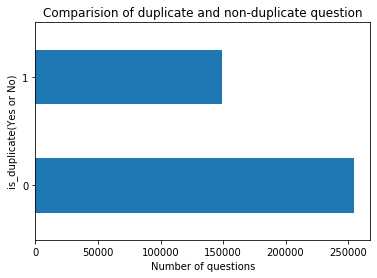

In [40]:
df['is_duplicate'].value_counts().plot(kind='barh')
plt.title("Comparision of duplicate and non-duplicate question")
plt.xlabel("Number of questions")
plt.ylabel("is_duplicate(Yes or No)")

We can see there are lots of questions which are asked only once ie: no duplicate questions are asked and there are more than 1.5 lac questions in training set which have duplicate questions.<b> It is not "Balanced dataset" because one class is dominatating.</b>

 ### 3.3.2 Number of unique questions
 

In [41]:
# merge all the questions in pandas series
merged_q1_q2 = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
unique_questions = np.unique(merged_q1_q2)
num_unique_qs = len(unique_questions)
print("There are ",str(num_unique_qs)," unique questions in training dataset")
# if questions are repeated
num_repeated_ques = sum(merged_q1_q2.value_counts()>1)
print("There are ",str(num_repeated_ques)," unique questions that is repeated in training dataset")
print(str(round(num_repeated_ques*100/(num_unique_qs),2)),"%  unique questions that is repeated in training dataset")
print("one question has occured ",str(max(merged_q1_q2.value_counts())),' times')

There are  537929  unique questions in training dataset
There are  111778  unique questions that is repeated in training dataset
20.78 %  unique questions that is repeated in training dataset
one question has occured  157  times


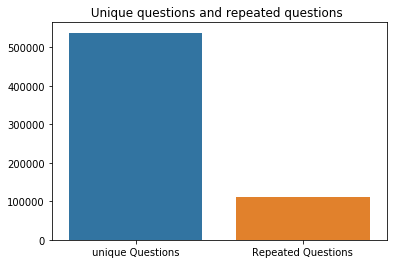

In [42]:
x = ["unique Questions" , "Repeated Questions"]
y =  [num_unique_qs , num_repeated_ques]
plt.title (" Unique questions and repeated questions  ")
sns.barplot(x,y)
plt.show()

### 3.3.3 Plotting question occurance plot 

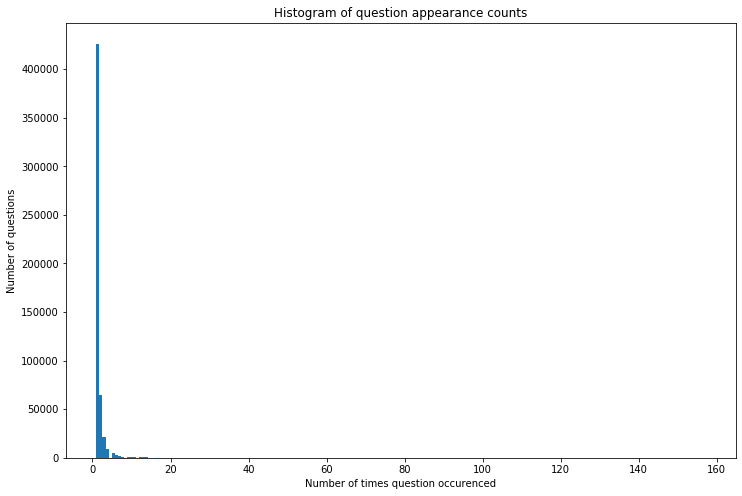

In [43]:
plt.figure(figsize=(12,8))
plt.hist(merged_q1_q2.value_counts(),bins=200)
plt.title('Histogram of question appearance counts')
plt.xlabel('Number of times question occurenced')
plt.ylabel('Number of questions')
plt.show()

It is very hard to visualize the occurance relation in given scale, we have to scale down the Number of questions axis, we can use log transform here.

Text(0, 0.5, 'Number of questions')

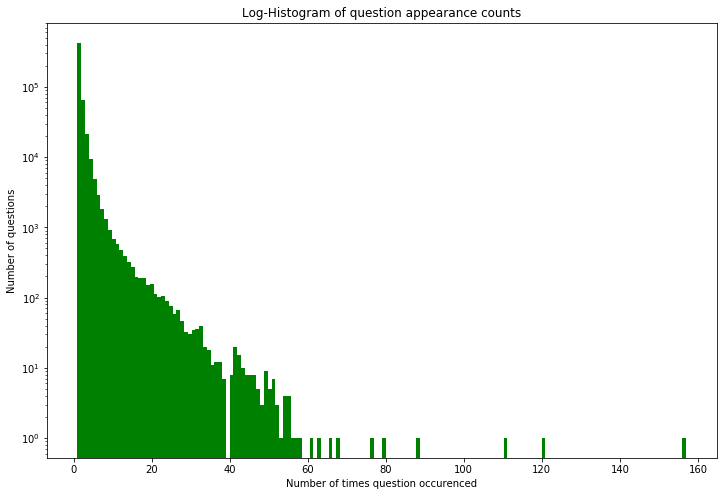

In [44]:
plt.figure(figsize=(12,8))
plt.hist(merged_q1_q2.value_counts(),bins=160,color=['green'])
plt.yscale('log')
plt.title('Log-Histogram of question appearance counts')
plt.xlabel('Number of times question occurenced')
plt.ylabel('Number of questions')

## Observation 
<ul>
  <li>One question has occuraced 157 time(extream right point in graph)</li>
  <li>Maximum question has occured once in given dataset.</li>
  <li>few questions have occured more than 60 times.</li>
</ul>


<h1 style="text-align:center;color:red;" > Feature Engineering </h1>


## 4.1 Creating artificial Features 
From domain knowledge, we can create many new features from the given dataset that may help the model to perform better.
### Observations
<ul>
  <li>If two questions are sharing common Question word (What, why, how, when,..), then there will be a higher probability that these questions will be duplicate as compared to questions having different question words.</li>
  <li>Number of common words may also play a role to decide if questions are duplicate or not.</li>
  <li>Length of questions can also play a role. so there can be many possible features. We will take a few of them and analyze.</li>
</ul>

Let us now construct a few features like:
 - ____1. freq_qid1____ = Frequency of qid1's
 - ____2. freq_qid2____ = Frequency of qid2's 
 - ____3. q1len____ = Length of q1
 - ____4. q2len____ = Length of q2
 - ____5. q1_n_words____ = Number of words in Question 1
 - ____6. q2_n_words____ = Number of words in Question 2
 - ____7. word_Common____ = (Number of common unique words in Question 1 and Question 2)
 - ____8. word_Total____ =(Total num of words in Question 1 + Total num of words in Question 2)
 - ____9. word_share____ = (word_common)/(word_Total)
 - ____10. freq_q1+freq_q2____ = sum total of frequency of qid1 and qid2 
 - ____11. freq_q1-freq_q2____ = absolute difference of frequency of qid1 and qid2 
 
 <b>Here 11 new features are created using domain knowledge that can help our model to perform better</b>
  

In [45]:
# Dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404287 entries, 0 to 404289
Data columns (total 6 columns):
id              404287 non-null int64
qid1            404287 non-null int64
qid2            404287 non-null int64
question1       404287 non-null object
question2       404287 non-null object
is_duplicate    404287 non-null int64
dtypes: int64(4), object(2)
memory usage: 21.6+ MB


In [46]:
# adding the freq_qid1 = Frequency of qid1's features
df['freq_qid1'] = df.groupby('qid1')['qid1'].transform('count')
print("freq_qid1 feature will contain number of times question with qid1 have occured as question1")
df.head(8)

freq_qid1 feature will contain number of times question with qid1 have occured as question1


,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,1
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,4
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,1
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,1
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,3
5,5,11,12,Astrology: I am a Capricorn Sun Cap moon and c...,"I'm a triple Capricorn (Sun, Moon and ascendan...",1,1
6,6,13,14,Should I buy tiago?,What keeps childern active and far from phone ...,0,1
7,7,15,16,How can I be a good geologist?,What should I do to be a great geologist?,1,1


In [47]:
# adding these freq_qid2 = Frequency of qid2's features
df['freq_qid2'] = df.groupby('qid2')['qid2'].transform('count')
print("freq_qid2 feature will contain number of times question with qid2 have occured as question2")
df.head(10)

freq_qid2 feature will contain number of times question with qid2 have occured as question2


,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,1,1
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,4,1
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,1,1
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,1,1
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,3,1
5,5,11,12,Astrology: I am a Capricorn Sun Cap moon and c...,"I'm a triple Capricorn (Sun, Moon and ascendan...",1,1,1
6,6,13,14,Should I buy tiago?,What keeps childern active and far from phone ...,0,1,1
7,7,15,16,How can I be a good geologist?,What should I do to be a great geologist?,1,1,1
8,8,17,18,When do you use シ instead of し?,"When do you use ""&"" instead of ""and""?",0,1,2
9,9,19,20,Motorola (company): Can I hack my Charter Moto...,How do I hack Motorola DCX3400 for free internet?,0,1,1


### Observation 
There are <b>few special symbols</b> (id=8 and question1 have special symbols). Which we have to preprocess.

In [48]:
# adding q1len = Length of q1 , q2len = Length of q2 feaatues
df['q1len'] = df['question1'].str.len()
df['q2len'] = df['question2'].str.len()
df.head(8)

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,1,1,66,57
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,4,1,51,88
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,1,1,73,59
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,1,1,50,65
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,3,1,76,39
5,5,11,12,Astrology: I am a Capricorn Sun Cap moon and c...,"I'm a triple Capricorn (Sun, Moon and ascendan...",1,1,1,86,90
6,6,13,14,Should I buy tiago?,What keeps childern active and far from phone ...,0,1,1,19,62
7,7,15,16,How can I be a good geologist?,What should I do to be a great geologist?,1,1,1,30,41


In [49]:
# adding  q1_n_words = Number of words in Question 1
df['q1_n_words'] = df['question1'].apply(lambda x: len(x.split(" ")))
df.head(10)

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,1,1,66,57,14
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,4,1,51,88,8
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,1,1,73,59,14
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,1,1,50,65,11
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,3,1,76,39,13
5,5,11,12,Astrology: I am a Capricorn Sun Cap moon and c...,"I'm a triple Capricorn (Sun, Moon and ascendan...",1,1,1,86,90,16
6,6,13,14,Should I buy tiago?,What keeps childern active and far from phone ...,0,1,1,19,62,4
7,7,15,16,How can I be a good geologist?,What should I do to be a great geologist?,1,1,1,30,41,7
8,8,17,18,When do you use シ instead of し?,"When do you use ""&"" instead of ""and""?",0,1,2,31,37,8
9,9,19,20,Motorola (company): Can I hack my Charter Moto...,How do I hack Motorola DCX3400 for free internet?,0,1,1,60,49,9


In [50]:
# adding  q2_n_words = Number of words in Question 2
df['q2_n_words'] = df['question2'].apply(lambda x: len(x.split(" ")))
df.head(10)

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,1,1,66,57,14,12
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,4,1,51,88,8,13
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,1,1,73,59,14,10
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,1,1,50,65,11,9
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,3,1,76,39,13,7
5,5,11,12,Astrology: I am a Capricorn Sun Cap moon and c...,"I'm a triple Capricorn (Sun, Moon and ascendan...",1,1,1,86,90,16,16
6,6,13,14,Should I buy tiago?,What keeps childern active and far from phone ...,0,1,1,19,62,4,11
7,7,15,16,How can I be a good geologist?,What should I do to be a great geologist?,1,1,1,30,41,7,9
8,8,17,18,When do you use シ instead of し?,"When do you use ""&"" instead of ""and""?",0,1,2,31,37,8,8
9,9,19,20,Motorola (company): Can I hack my Charter Moto...,How do I hack Motorola DCX3400 for free internet?,0,1,1,60,49,9,9


In [51]:
# adding word common feature
def commom_word_length(row):
        words1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
        words2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
        return len(words1 & words2)
df['word_Common'] = df.apply(commom_word_length, axis=1)
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,1,1,66,57,14,12,10
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,4,1,51,88,8,13,4
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,1,1,73,59,14,10,4
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,1,1,50,65,11,9,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,3,1,76,39,13,7,2


In [54]:
# adding total words in both questions 
def total_words(row):
    words1 = set(map(lambda x:x.lower().strip(), row['question1'].split(" ")))
    words2 = set(map(lambda x:x.lower().strip(), row['question1'].split(" ")))
    return len(words1)+len(words2)
df['total_words_in2'] = df.apply(total_words, axis =1)
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,total_words_in2,words_share
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,1,1,66,57,14,12,10,24,0.434783
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,4,1,51,88,8,13,4,16,0.200000
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,1,1,73,59,14,10,4,28,0.166667
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,1,1,50,65,11,9,0,20,0.000000
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,3,1,76,39,13,7,2,26,0.100000


In [55]:
# word_share = (word_common)/(word_Total)
# adding word_share features
def words_share(row):
    words1 = set(map(lambda x: x.lower().strip(), row['question1'].split(" ")))
    words2 = set(map(lambda x: x.lower().strip(), row['question2'].split(" ")))
    return len(words1 & words2)/(len(words1)+len(words2))
df['words_share'] = df.apply(words_share, axis=1)
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,total_words_in2,words_share
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,1,1,66,57,14,12,10,24,0.434783
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,4,1,51,88,8,13,4,16,0.200000
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,1,1,73,59,14,10,4,28,0.166667
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,1,1,50,65,11,9,0,20,0.000000
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,3,1,76,39,13,7,2,26,0.100000


In [56]:
# adding sum of frequency and absolute difference of frequency
df['freq_q1+q2'] = df['freq_qid1']+df['freq_qid2']
df['freq_q1-q2'] = abs(df['freq_qid1']-df['freq_qid2'])
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,total_words_in2,words_share,freq_q1+q2,freq_q1-q2
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,1,1,66,57,14,12,10,24,0.434783,2,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,4,1,51,88,8,13,4,16,0.200000,5,3
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,1,1,73,59,14,10,4,28,0.166667,2,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,1,1,50,65,11,9,0,20,0.000000,2,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,3,1,76,39,13,7,2,26,0.100000,4,2


All the artificial features are added.

In [ ]:
df.info()

In [ ]:
print("There are "+ str(df.shape[0]) + " Data points in the updated training set")
print("There are "+ str(df.shape[1]) + " features in the updated training set")
print('We had 6 features, we added 11 more features.')
df.shape

# 4.2 Vizualization of artificial features

## 4.2.1 Vizualization of Word_share features

In [ ]:
plt.figure(figsize=(12, 8))
plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'words_share', data = df[0:])
plt.subplot(1,2,2)
sns.distplot(df[df['is_duplicate'] == 1.0]['words_share'][0:] , label = "1", color = 'red')
sns.distplot(df[df['is_duplicate'] == 0.0]['words_share'][0:] , label = "0" , color = 'green' )
plt.show()

# Observations
<ol>
  <li>In violinplot, if questions are duplicate(ie. is_duplicate=1) then average word share is more as compared to non-similar questions.</li>
  <li>The distributionn of words_share is highly overlapping on right side which implies there are many questions which have high word share.</li>
  <li>Red cure is more towards right that is more word share, similar questions.</li>
</ol>

# 4.2.2 Vizualization of word_common features

In [ ]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
sns.violinplot(x='is_duplicate' , y='word_Common', data=df)
plt.subplot(1,2,2)
sns.distplot(df[df['is_duplicate']==1.0]['word_Common'], label='1', color='red')
sns.distplot(df[df['is_duplicate']==0.0]['word_Common'],label='0',color='green')
plt.show()

# Observations
<ul>
  <li> In violinplot, if question is duplicate, average common words will be more. </li>
     <li>The distributions of duplicate and non-duplicate questions are highly overlapping.</li>
</ul>

<h1 style="text-align:center;color:red;" > Advance EDA</h1>
